# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url).json()["coord"]["lat"]
        city_lng = requests.get(city_url).json()["coord"]["lon"]
        city_max_temp = requests.get(city_url).json()["main"]["temp_max"]
        city_humidity = requests.get(city_url).json()["main"]["humidity"]
        city_clouds = requests.get(city_url).json()["clouds"]["all"]
        city_wind = requests.get(city_url).json()["wind"]["speed"]
        city_country = requests.get(city_url).json()["sys"]["country"]
        city_date = requests.get(city_url).json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hede
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | horta
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | bulayevo
Processing Record 7 of Set 1 | ak-dovurak
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | siwa oasis
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | yemetsk
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | bakanas
Processing Record 16 of Set 1 | tchintabaraden
Processing Record 17 of Set 1 | uglich
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | port m

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hede,33.7681,120.2517,29.88,79,0,3.97,CN,1722383351
1,edinburgh of the seven seas,-37.0676,-12.3116,15.09,90,80,16.47,SH,1722383354
2,horta,38.5333,-28.6333,21.68,84,77,3.13,PT,1722383358
3,jamestown,42.0970,-79.2353,24.77,91,75,2.57,US,1722383362
4,grytviken,-54.2811,-36.5092,-0.94,96,87,5.90,GS,1722383365


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hede,33.7681,120.2517,29.88,79,0,3.97,CN,1722383351
1,edinburgh of the seven seas,-37.0676,-12.3116,15.09,90,80,16.47,SH,1722383354
2,horta,38.5333,-28.6333,21.68,84,77,3.13,PT,1722383358
3,jamestown,42.0970,-79.2353,24.77,91,75,2.57,US,1722383362
4,grytviken,-54.2811,-36.5092,-0.94,96,87,5.90,GS,1722383365


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

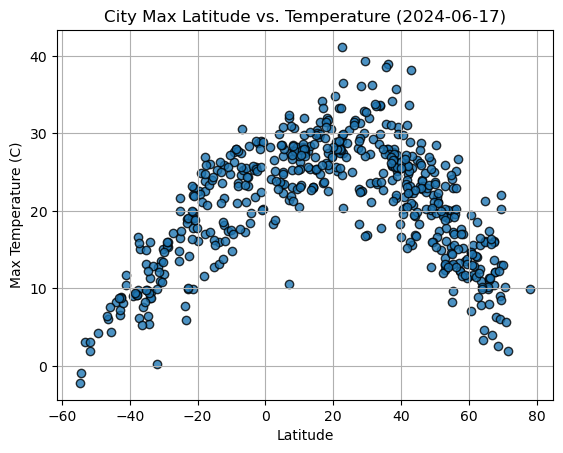

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1A.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

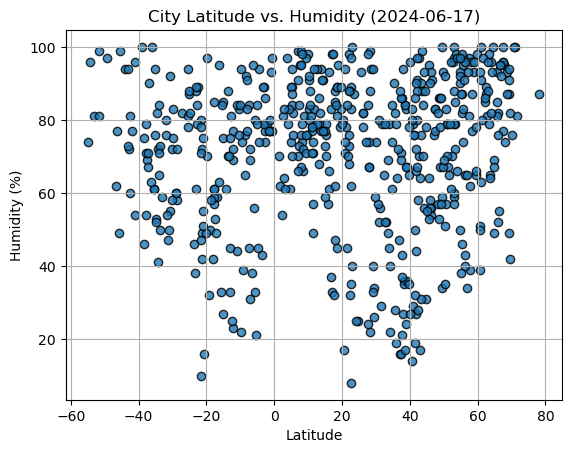

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2A.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

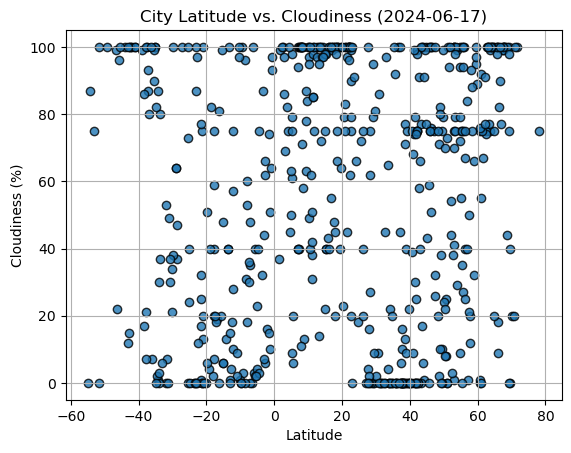

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3A.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

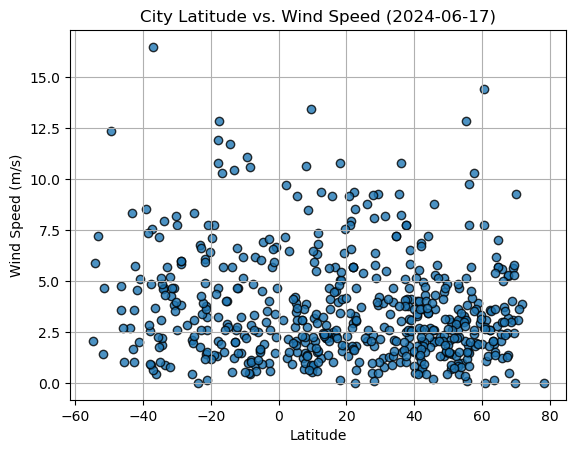

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4A.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hede,33.7681,120.2517,29.88,79,0,3.97,CN,1722383351
2,horta,38.5333,-28.6333,21.68,84,77,3.13,PT,1722383358
3,jamestown,42.0970,-79.2353,24.77,91,75,2.57,US,1722383362
5,bulayevo,54.9056,70.4439,15.34,90,94,3.07,KZ,1722383369
6,ak-dovurak,51.1833,90.6000,17.43,67,100,1.43,RU,1722383372


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,15.09,90,80,16.47,SH,1722383354
4,grytviken,-54.2811,-36.5092,-0.94,96,87,5.90,GS,1722383365
7,lorengau,-2.0226,147.2712,28.75,79,16,5.67,PG,1722383376
8,puerto natales,-51.7236,-72.4875,1.96,99,100,1.40,CL,1722383380
12,adamstown,-25.0660,-130.1015,21.66,87,24,8.34,PN,1722383395


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.46823478239851724


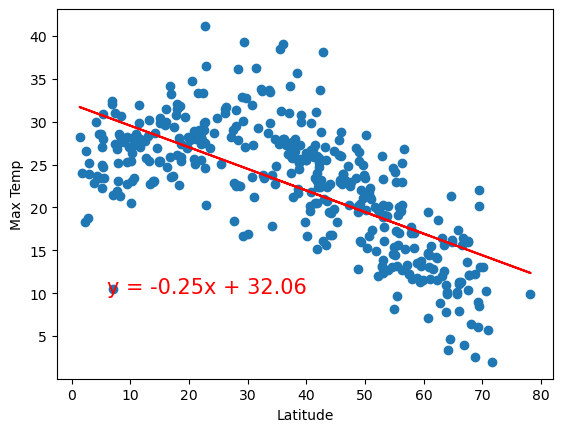

In [47]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Max Temp"
text_coordinates = (6, 10)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.7239203557837275


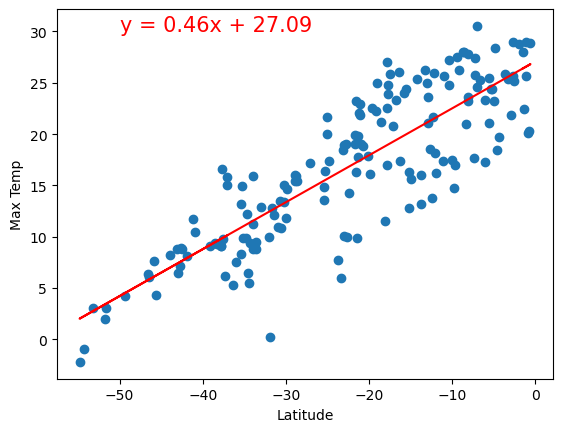

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Max Temp" 
text_coordinates = (-50, 30)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002313506626291801


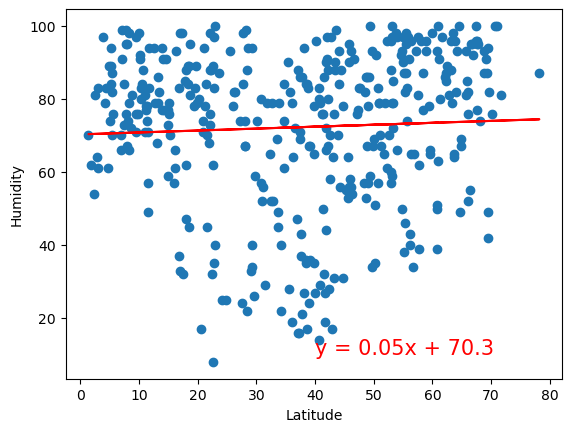

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Humidity"
text_coordinates = (40, 10)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.013663904281840469


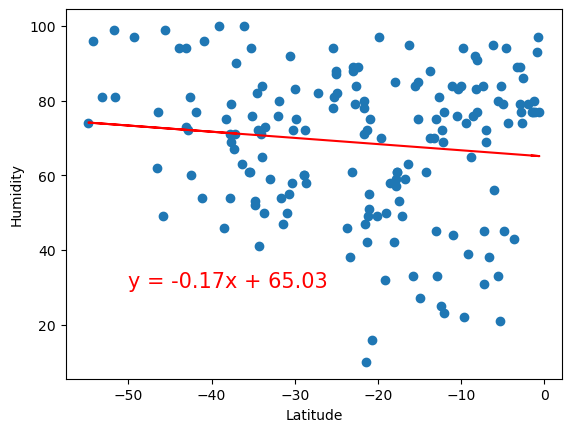

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = "Humidity"
text_coordinates = (-50, 30)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002883222206191417


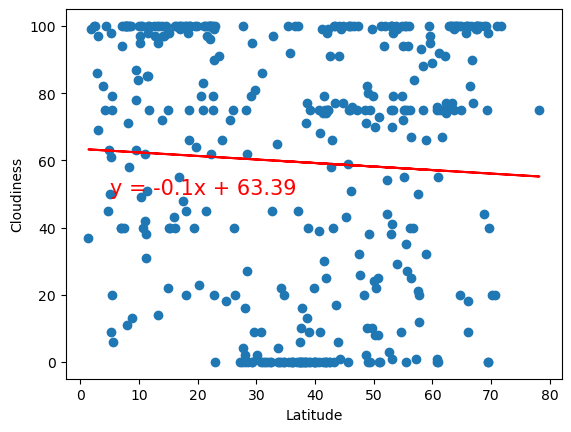

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = "Cloudiness"
text_coordinates = (5, 50)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.07283623575328783


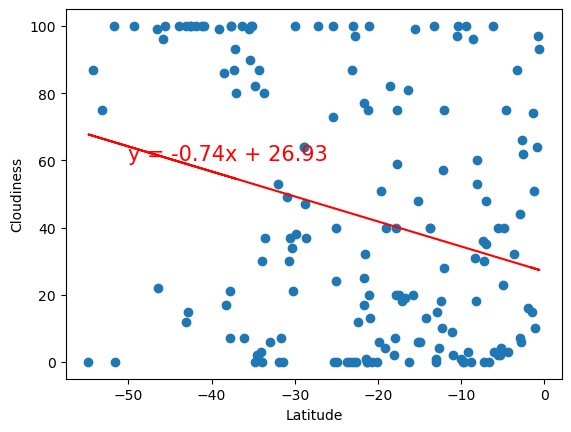

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness'] 
title = "Cloudiness"
text_coordinates = (-50, 60)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005338829706529461


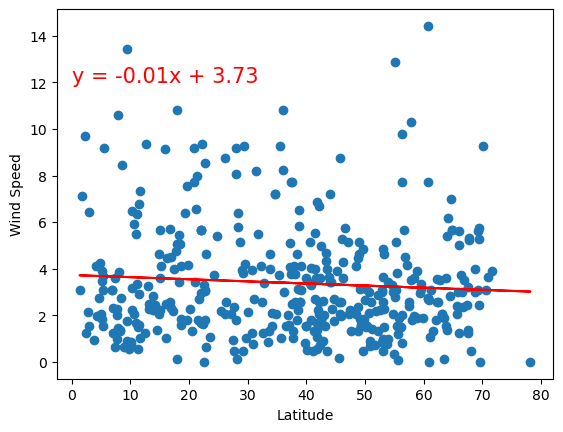

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = "Wind Speed"
text_coordinates = (0, 12)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.008319995772391826


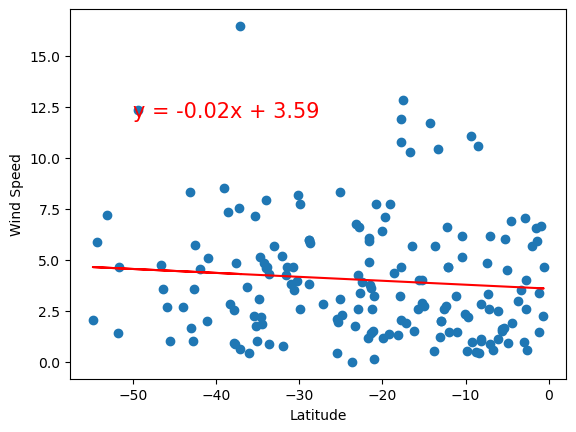

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = "Wind Speed"
text_coordinates = (-50, 12)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE